In [1]:
import networkx as nx
import numpy as np
import random
random.seed;
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
from scipy.sparse import linalg
import time
import math
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from random import shuffle

import sys
sys.path += ['/Package/'] ### Specify the directory where the Package is
from clustering import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
'''This function outputs the directed edge list representation given the adjacency matrix'''

def edge_list(A): # given the adjacency matrix it return the directed edge list representation
    
    size = sum(np.sum(A,axis = 0))  # number of (directed) edges in the network
    edge_list = [[] for x in range(size)]
    k = 0
    
    for i in range(len(A)):
        for j in range(i+1,len(A)):
            
            if A[i,j] == 1:
                edge_list[k] = [i,j]
                edge_list[k+1] = [j,i]
                k += 2
                
    return edge_list  


'''This function generates the non-backtracking matrix from the adjacency matrix'''

def non_backtraking(A):
    
    el =  edge_list(A)
    
    m = len(el) # m is twice the number of the total edges
    B = np.zeros((m,m)) 
    
    for i in range(m):
        for j in range(m):
            if el[i][1] == el[j][0] and el[i][0] != el[j][1]:
                B[i][j] = 1
                
    return B

In [3]:
n = 4000# number of nodes
fraction = int(n/2) # number of elements in the first class
number_sim = 3 # superposition of 3 spectra
assortativity = 1

# vertices = np.arange(n)
classes = np.zeros(n)
classes[:fraction] = 1 # class assignment (0 or 1)

# n_clusters = 2
c_in_v = np.zeros(number_sim)
c_out_v = np.zeros(number_sim)

######## creation of the c_in and c_out vectors #######

c_out = 1
c_in = 10
c_in_v = np.zeros(number_sim)
c_out_v = np.zeros(number_sim)
jump = 1
for i in range(number_sim):
    c_in_v[i] = c_in - jump*i
    c_out_v[i] = c_out + jump*i
    

theta = np.random.uniform(3,10,n)**4
theta = theta/np.mean(theta)

phi = np.mean(theta**2)
X = [[] for i in range(number_sim)]
Y = [[] for i in range(number_sim)]

### Simulation

In [10]:
for i in range(number_sim):
        
    c_in = c_in_v[i]
    c_out = c_out_v[i]
    c = 0.5*(c_in+c_out)

    A = adj(c_in,c_out,theta,fraction)
    B = non_backtraking(A)
    val = np.linalg.eigvals(B)
    X[i] = val.real
    Y[i] = val.imag
    print(i)

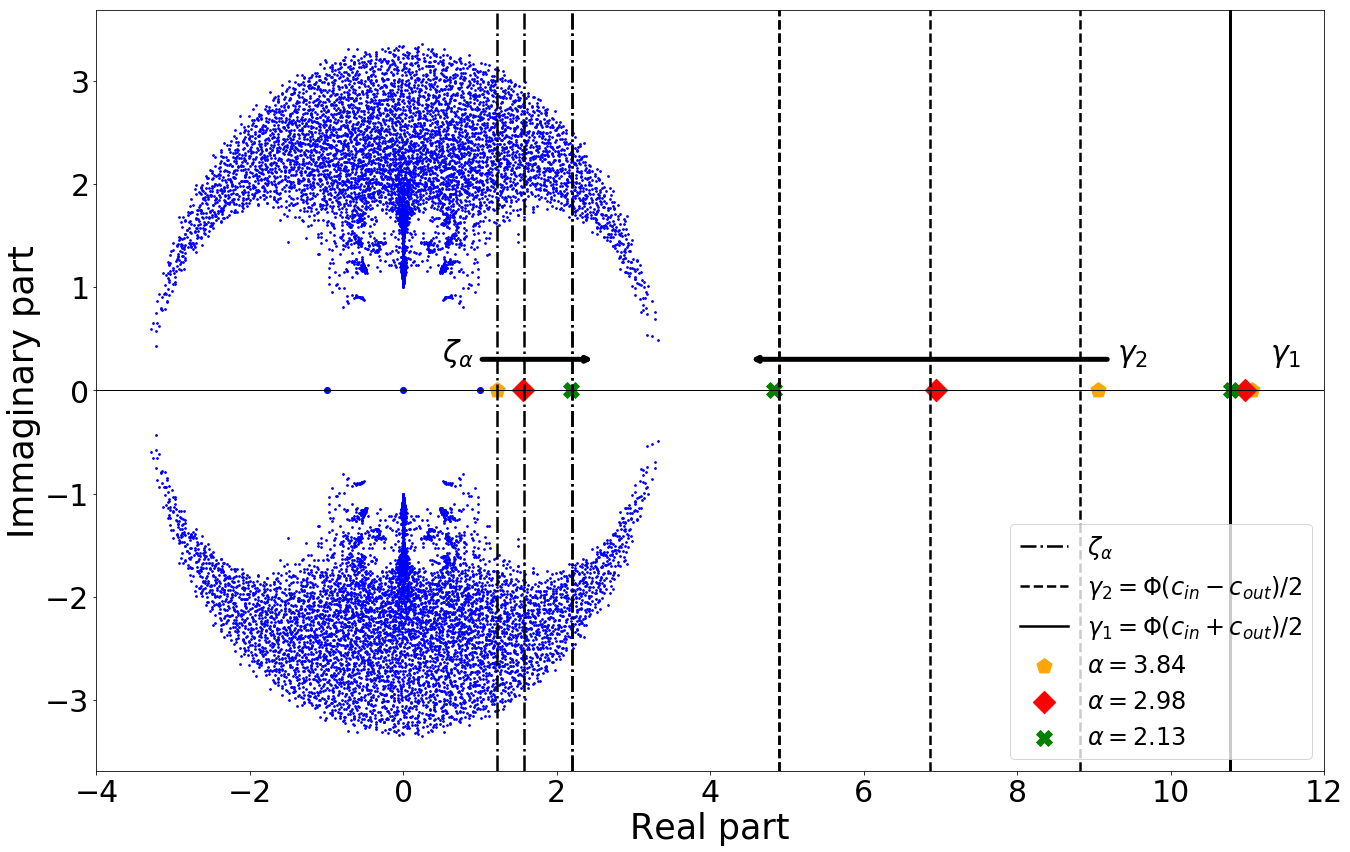

In [6]:
plt.figure(figsize = (22,14))
colors = ['orange','red','green','green','black']
marker = ['p','D','X','s']
phi = np.mean(theta**2)
lw = 2.5
ms = 250
for i in range(number_sim):
    x = X[i]
    y = Y[i]
    plt.scatter(x,y,s = 3,color = 'blue')
    a = x[y == 0]
    a = a[np.abs(a)>1.1]
    c_in = c_in_v[i]
    c_out = c_out_v[i]
    alpha = (c_in - c_out)/np.sqrt(0.5*(c_in+c_out))
    plt.scatter(a, np.zeros(len(a)),color = colors[i],label = r'$\alpha = $' + str(np.round(alpha,2)), s = ms, marker = marker[i])
    plt.axvline((c_in+c_out)/(c_in-c_out),color = 'k', linestyle = '-.', linewidth = lw)
    plt.axvline((c_in-c_out)/2*phi, color = 'k', linestyle = '--', linewidth = lw)
    plt.axvline((c_in+c_out)/2*phi, color = 'k', linewidth = 1.1*lw)
    v = np.linspace(-4,13)
    plt.plot(v,np.zeros(len(v)),color = 'k',linewidth = 1.)

plt.axvline((c_in+c_out)/(c_in-c_out),color = 'k', linestyle = '-.', linewidth = lw,label = r'$\zeta_{\alpha}$')
plt.axvline((c_in-c_out)/2*phi, color = 'k', linestyle = '--', linewidth = lw, label = r'$\gamma_2 = \Phi(c_{in}-c_{out})/2$')
plt.axvline((c_in+c_out)/2*phi, color = 'k', linewidth = lw, label = r'$\gamma_1 = \Phi(c_{in}+c_{out})/2$')
g = [-1,0,1]
plt.scatter(g,[0,0,0],color = 'blue')
plt.xlim(-4,12)
plt.annotate(s='', xy=(2.5,0.3), xytext=(1,0.3), arrowprops=dict(arrowstyle='->',facecolor='black', lw=2*lw))
plt.annotate(s='', xy=(9.2,0.3), xytext=(4.5,0.3), arrowprops=dict(arrowstyle='<-',facecolor='black', lw=2*lw))
plt.text(0.5,0.28,r'$\zeta_{\alpha}$',fontsize = 30)
plt.text(9.3,0.28,r'$\gamma_2$',fontsize = 30)
plt.text(11.3,0.28,r'$\gamma_1$',fontsize = 30)
plt.xlabel('Real part', fontsize = 35)
plt.ylabel('Immaginary part', fontsize = 35)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 30)
plt.legend(loc = 4,fontsize = 24);